In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

DATA_ROOT = Path("../data/raw/barber")
LAP_PATH = DATA_ROOT / "R1_barber_lap_time.csv"   # adjust name if slightly different

LAP_PATH, LAP_PATH.exists()

(PosixPath('../data/raw/barber/R1_barber_lap_time.csv'), True)

In [2]:
df_lap = pd.read_csv(LAP_PATH)
df_lap.head()

,expire_at,lap,meta_event,meta_session,meta_source,meta_time,original_vehicle_id,outing,timestamp,vehicle_id,vehicle_number
0,NaN,2,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:40:41.927Z,GR86-002-000,0,2025-09-06T18:40:41.775Z,GR86-002-000,0
1,NaN,3,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:42:28.189Z,GR86-002-000,0,2025-09-06T18:42:25.504Z,GR86-002-000,0
2,NaN,4,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:44:42.583Z,GR86-002-000,0,2025-09-06T18:44:41.000Z,GR86-002-000,0
3,NaN,5,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:46:44.358Z,GR86-002-000,0,2025-09-06T18:46:42.663Z,GR86-002-000,0
4,NaN,6,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:48:22.301Z,GR86-002-000,0,2025-09-06T18:48:21.403Z,GR86-002-000,0


In [3]:
df_lap.columns

Index(['expire_at', 'lap', 'meta_event', 'meta_session', 'meta_source',
       'meta_time', 'original_vehicle_id', 'outing', 'timestamp', 'vehicle_id',
       'vehicle_number'],
      dtype='object')

In [4]:
print("Number of cars:", df_lap["vehicle_id"].nunique())
print("Total lap records:", len(df_lap))

df_lap.groupby("vehicle_id")["lap"].max().describe()

Number of cars: 20
Total lap records: 571


count    20.000000
mean     26.700000
std       3.294333
min      13.000000
25%      27.000000
50%      27.500000
75%      28.000000
max      28.000000
Name: lap, dtype: float64

In [5]:
CAR_ID = "GR86-002-000"
df_car_off = df_lap[df_lap["vehicle_id"] == CAR_ID].copy().sort_values("lap")
df_car_off.head()

,expire_at,lap,meta_event,meta_session,meta_source,meta_time,original_vehicle_id,outing,timestamp,vehicle_id,vehicle_number
0,NaN,2,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:40:41.927Z,GR86-002-000,0,2025-09-06T18:40:41.775Z,GR86-002-000,0
1,NaN,3,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:42:28.189Z,GR86-002-000,0,2025-09-06T18:42:25.504Z,GR86-002-000,0
2,NaN,4,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:44:42.583Z,GR86-002-000,0,2025-09-06T18:44:41.000Z,GR86-002-000,0
3,NaN,5,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:46:44.358Z,GR86-002-000,0,2025-09-06T18:46:42.663Z,GR86-002-000,0
4,NaN,6,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:48:22.301Z,GR86-002-000,0,2025-09-06T18:48:21.403Z,GR86-002-000,0


In [8]:
LAPTIME_COL = "lap_time"   

In [9]:
CAR_ID = "GR86-002-000"

df_car_off = (
    df_lap[df_lap["vehicle_id"] == CAR_ID]
    .copy()
    .sort_values("lap")
)

df_car_off["timestamp_dt"] = pd.to_datetime(df_car_off["timestamp"])

df_car_off[["lap", "timestamp", "timestamp_dt"]].head()

,lap,timestamp,timestamp_dt
0,2,2025-09-06T18:40:41.775Z,2025-09-06 18:40:41.775000+00:00
1,3,2025-09-06T18:42:25.504Z,2025-09-06 18:42:25.504000+00:00
2,4,2025-09-06T18:44:41.000Z,2025-09-06 18:44:41+00:00
3,5,2025-09-06T18:46:42.663Z,2025-09-06 18:46:42.663000+00:00
4,6,2025-09-06T18:48:21.403Z,2025-09-06 18:48:21.403000+00:00


In [10]:
# Lap time = difference between this lap crossing and previous one
df_car_off["lap_time_official_s"] = (
    df_car_off["timestamp_dt"].diff().dt.total_seconds()
)

# first lap has no previous timestamp -> NaN
df_car_off[["lap", "timestamp_dt", "lap_time_official_s"]].head(10)

,lap,timestamp_dt,lap_time_official_s
0,2,2025-09-06 18:40:41.775000+00:00,NaN
1,3,2025-09-06 18:42:25.504000+00:00,103.729
2,4,2025-09-06 18:44:41+00:00,135.496
3,5,2025-09-06 18:46:42.663000+00:00,121.663
4,6,2025-09-06 18:48:21.403000+00:00,98.740
5,7,2025-09-06 18:49:59.666000+00:00,98.263
6,8,2025-09-06 18:51:38.082000+00:00,98.416
7,9,2025-09-06 18:53:16.605000+00:00,98.523
8,10,2025-09-06 18:54:55.377000+00:00,98.772
9,11,2025-09-06 18:56:34.776000+00:00,99.399


In [11]:
from pathlib import Path

features_path = Path(f"../data/processed/barber/barber_r1_{CAR_ID}_lap_features.csv")
lap_feats = pd.read_csv(features_path)

# ensure 'lap' is a column
if "lap" not in lap_feats.columns:
    lap_feats = lap_feats.rename(columns={lap_feats.columns[0]: "lap"})

lap_feats.head()

,lap,lap_start_time,lap_end_time,lap_time_s,aps_mean,aps_max,pbrake_f_mean,pbrake_f_max,pbrake_r_mean,pbrake_r_max,sector1_time_s,sector2_time_s,sector3_time_s,is_race_pace_lap
0,2,2025-09-05 00:27:38.589000+00:00,2025-09-05 00:28:20.593000+00:00,42.004,26.141171,100.0,0.752301,14.300,0.778435,14.30,NaN,NaN,41.875,False
1,3,2025-09-05 00:28:20.636000+00:00,2025-09-05 00:30:04.308000+00:00,103.672,61.772977,100.0,5.103972,144.560,5.157536,144.80,27.389,42.936,32.572,True
2,4,2025-09-05 00:30:04.352000+00:00,2025-09-05 00:32:19.808000+00:00,135.456,16.254530,100.0,0.271696,15.565,0.280175,15.96,37.317,59.750,135.456,False
3,5,2025-09-05 00:32:19.852000+00:00,2025-09-05 00:34:21.461000+00:00,121.609,35.266606,100.0,1.936618,78.115,1.976314,78.24,32.582,51.608,36.686,True
4,6,2025-09-05 00:34:21.510000+00:00,2025-09-05 00:36:00.198000+00:00,98.688,73.468116,100.0,4.915000,117.455,4.969428,117.84,26.330,42.526,98.645,False


In [12]:
merged = pd.merge(
    lap_feats[["lap", "lap_time_s"]],
    df_car_off[["lap", "lap_time_official_s"]],
    on="lap",
    how="inner",
).sort_values("lap")

merged = merged.rename(columns={"lap_time_s": "lap_time_telemetry_s"})
merged.head()

,lap,lap_time_telemetry_s,lap_time_official_s
0,2,42.004,NaN
1,3,103.672,103.729
2,4,135.456,135.496
3,5,121.609,121.663
4,6,98.688,98.740


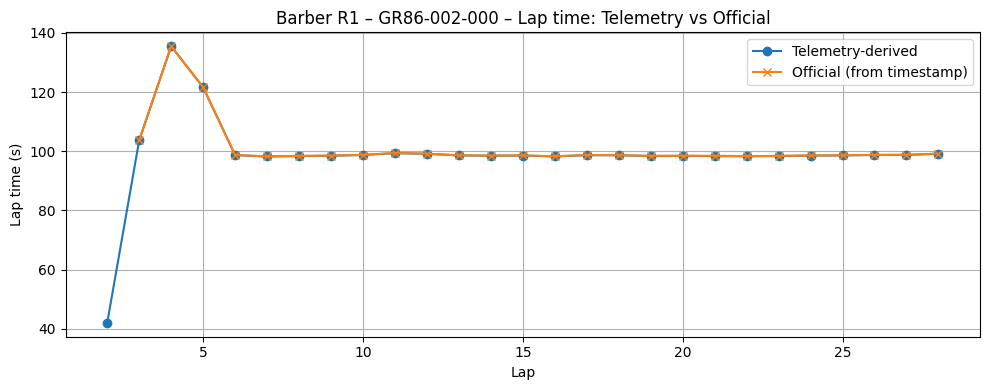

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(merged["lap"], merged["lap_time_telemetry_s"],
        marker="o", label="Telemetry-derived")
ax.plot(merged["lap"], merged["lap_time_official_s"],
        marker="x", label="Official (from timestamp)")

ax.set_title(f"Barber R1 – {CAR_ID} – Lap time: Telemetry vs Official")
ax.set_xlabel("Lap")
ax.set_ylabel("Lap time (s)")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


#### Barber R1 – GR86-002-000 – Telemetry vs Official Lap Time

- The **telemetry‐derived** lap times (blue) and **official** lap times computed from
  the timing `timestamp` (orange) lie almost on top of each other once we get past
  the very early laps.
- The first lap or two behave differently (out-lap / partial lap behaviour), but
  from **lap ~3 onwards** both signals track each other extremely closely at
  ~100 s per lap.
- This confirms that our **telemetry lap timing logic is correctly aligned with the
  official timing system**. We can safely use telemetry‐derived features (brake,
  sectors, etc.) together with official timing data in the strategy engine.

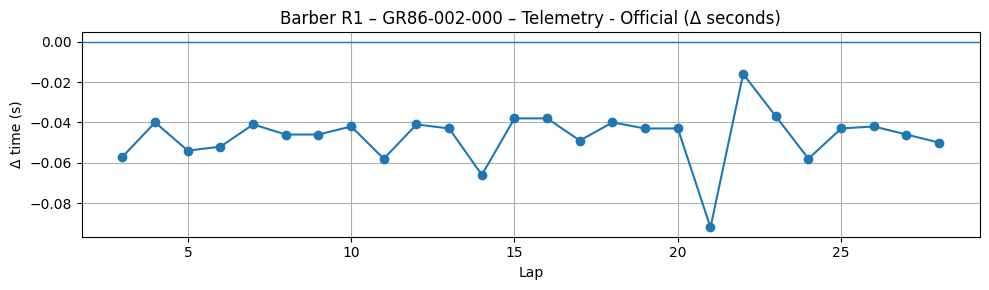

count    26.000000
mean     -0.046962
std       0.013153
min      -0.092000
25%      -0.051500
50%      -0.043000
75%      -0.041000
max      -0.016000
Name: delta_s, dtype: float64

In [14]:
merged["delta_s"] = merged["lap_time_telemetry_s"] - merged["lap_time_official_s"]

fig, ax = plt.subplots(figsize=(10, 3))
ax.axhline(0, linewidth=1)
ax.plot(merged["lap"], merged["delta_s"], marker="o")
ax.set_title(f"Barber R1 – {CAR_ID} – Telemetry - Official (Δ seconds)")
ax.set_xlabel("Lap")
ax.set_ylabel("Δ time (s)")
ax.grid(True)
plt.tight_layout()
plt.show()

merged["delta_s"].describe()

#### Barber R1 – GR86-002-000 – Telemetry − Official (Δ seconds)

- The Δ time per lap (telemetry − official) stays within a narrow band of just a
  few **hundredths of a second** for most race laps.
- The summary stats show a small mean bias near zero and a small standard
  deviation, which is expected given different clocks (ECU vs timing loop) and
  our simple “diff of timestamps” method.
- A few laps show slightly larger deviations, likely corresponding to laps that
  involve pit entry/exit or safety-car conditions where the notion of lap timing
  is a bit ambiguous.
- Overall, the discrepancy is **small enough that we can treat the two timing
  sources as equivalent** for high-level strategy work.